# TimSort -- Insertion sort and Merge Sort

TimSort is a sorting algorithm based on Insertion Sort and Merge Sort.

- A stable sorting algorithm works in O(n Log n) time

- Used in Java’s Arrays.sort() as well as Python’s sorted() and sort().

- First sort small pieces using Insertion Sort, then merges the pieces using merge of merge sort.


## Quick Review: Insertion sort

Insertion sort is a simple sorting algorithm that works the way we sort playing cards in our hands.

**Algorithm**
// Sort an arr[] of size n
insertionSort(arr, n)
Loop from i = 1 to n-1.
    Pick element arr[i] and insert it into sorted sequence arr[0…i-1]

**Example**:

<img src=https://media.geeksforgeeks.org/wp-content/uploads/insertionsort.png style="width:300px" />

In [1]:
# Python program for implementation of Insertion Sort 
# Function to do insertion sort 
def insertionSort(arr): 
    # Traverse through 1 to len(arr) 
    for i in range(1, len(arr)): 
        key = arr[i] 
        # Move elements of arr[0..i-1], that are 
        # greater than key, to one position ahead 
        # of their current position 
        j = i-1
        while j >= 0 and key < arr[j] : 
                arr[j + 1] = arr[j] 
                j -= 1
        arr[j + 1] = key 
    return arr

# Driver code to test above 
arr = [12, 11, 13, 5, 6] 
print(f"Original array: {arr}") 
arr = insertionSort(arr) 
print(f"Sorted array  : {arr}") 

Original array: [12, 11, 13, 5, 6]
Sorted array  : [5, 6, 11, 12, 13]


### Summary: 
- Time Complexity: $O(n^2)$
- Auxiliary Space: $O(1)$
- Boundary Cases: Insertion sort takes maximum time to sort if elements are sorted in reverse order. And it takes minimum time (Order of n) when elements are already sorted.
- Algorithmic Paradigm: Incremental Approach
- Sorting In Place: Yes
- Stable: Yes
- Online: Yes
- Uses: Insertion sort is used when number of elements is small. It can also be useful when input array is almost sorted, only few elements are misplaced in complete big array.

## TimSort 

We divide the Array into blocks known as Run. We sort those runs using insertion sort one by one and then merge those runs using combine function used in merge sort. 

If the size of Array is less than run, then Array get sorted just by using **Insertion Sort**. The size of `run` may vary from `32` to `64` depending upon the size of the array. 

Note that merge function performs well when sizes subarrays are powers of `2`. The idea is based on the fact that **insertion sort performs well for small arrays**.

In [15]:
# Python3 program to perform TimSort.  
RUN = 32 
    
# This function sorts array from left index to  
# to right index which is of size atmost RUN  
def insertionSort(arr, left, right):  
    for i in range(left + 1, right+1):  
        key = arr[i]  
        j = i - 1 
        while j >= left and arr[j] > key :  
            arr[j+1] = arr[j]  
            j -= 1
        arr[j+1] = key  
    return arr 
    
# merge function merges the sorted runs  
def merge(arr, l, m, r): 
    # original array is broken in two parts  
    # left and right array  
    len1, len2 =  m - l + 1, r - m  
    left, right = [], []  
    for i in range(0, len1):  
        left.append(arr[l + i])  
    for i in range(0, len2):  
        right.append(arr[m + 1 + i])  
    
    i, j, k = 0, 0, l 
    # after comparing, we merge those two array  
    # in larger sub array  
    while i < len1 and j < len2:  
       
        if left[i] <= right[j]:  
            arr[k] = left[i]  
            i += 1 
        else: 
            arr[k] = right[j]  
            j += 1 
        k += 1
       
    # copy remaining elements of left, if any  
    while i < len1:  
        arr[k] = left[i]  
        k += 1 
        i += 1
    # copy remaining element of right, if any  
    while j < len2:  
        arr[k] = right[j]  
        k += 1
        j += 1
    return arr


# iterative Timsort function to sort the  
# array[0...n-1] (similar to merge sort)  

def timSort(arr):  
    n = len(arr)  
    # Sort individual subarrays of size RUN  
    for i in range(0, n, RUN):  
        arr = insertionSort(arr, i, min((i+RUN-1), (n-1)))  
    # start merging from size RUN (or 32). It will merge  
    # to form size 64, then 128, 256 and so on ....  
    size = RUN 
    while size < n:  
        # pick starting point of left sub array. We  
        # are going to merge arr[left..left+size-1]  
        # and arr[left+size, left+2*size-1]  
        # After every merge, we increase left by 2*size  
        for left in range(0, n, 2*size):  
            # find ending point of left sub array  
            # mid+1 is starting point of right sub array  
            mid = left + size - 1 
            right = min((left + 2*size - 1), (n-1))  
            # merge sub array arr[left.....mid] &  
            # arr[mid+1....right]  
            arr = merge(arr, left, mid, right)  
        size = 2*size 
    return arr
 
# Driver program to test above function  
if __name__ == "__main__": 
    arr = [5, 21, 7, 23, 19, 109, 78, 67, 21, 35, 0, -2]  
    print(f"Given Array is : {arr}")  
    timSort(arr)  
    print(f"Sorted Array is: {arr}")  
 

Given Array is : [5, 21, 7, 23, 19, 109, 78, 67, 21, 35, 0, -2]
Sorted Array is: [-2, 0, 5, 7, 19, 21, 21, 23, 35, 67, 78, 109]


In [16]:
import random

arr = random.sample(range(-255, 255), 128)
print(f"Given Array is :\n {arr}")  

arr_timsort = timSort(arr)  
print(f"Sorted Array is:\n {arr_timsort}")  

Given Array is :
 [39, 147, 33, 94, 27, -163, 231, -215, 250, 115, 24, -240, -81, -236, 232, -63, 47, 23, 170, 163, 6, -213, -178, -122, 254, -105, 219, -104, 152, 36, 138, 192, 0, 197, 20, -237, 207, 43, 54, -31, 120, 109, -174, 16, -171, 165, 184, -197, 136, -210, -86, -37, 29, 193, -61, -112, -182, -231, -98, -175, -149, -150, -3, 227, -91, 233, -21, -250, -147, 96, 162, 187, 240, -200, 176, 110, -170, -2, 185, -179, -101, 186, 101, -132, -157, -238, -12, -252, 93, 45, -51, -247, -218, -46, 64, 133, 99, 74, 121, 28, 204, -195, -6, 60, 228, -249, -168, -113, -83, -222, -180, -53, 105, 116, 212, -167, 51, -232, -54, 196, 234, -17, -32, -14, 75, -27, -203, 131]
Sorted Array is:
 [-252, -250, -249, -247, -240, -238, -237, -236, -232, -231, -222, -218, -215, -213, -210, -203, -200, -197, -195, -182, -180, -179, -178, -175, -174, -171, -170, -168, -167, -163, -157, -150, -149, -147, -132, -122, -113, -112, -105, -104, -101, -98, -91, -86, -83, -81, -63, -61, -54, -53, -51, -46, -37, -32, 

<StemContainer object of 3 artists>

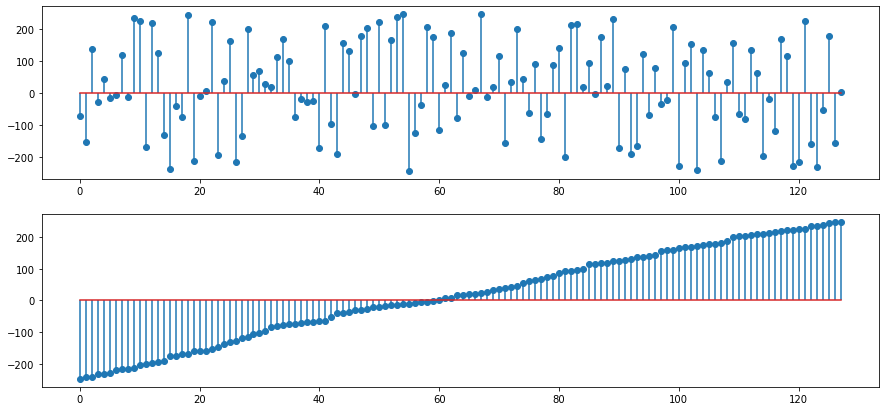

In [17]:
import matplotlib
import matplotlib.pyplot as plt

x = range(128)
arr = random.sample(range(-255, 255), 128)

plt.figure(figsize = (15, 7))
plt.subplot(211)
plt.stem(x, arr, use_line_collection=True )

arr_timsort = timSort(arr)  
plt.subplot(212)
plt.stem(x, arr_timsort, use_line_collection=True)